In [1]:
import gzip

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt

# Preprocessing

## Meta data

In [2]:
def read_geo_series_matrix(file_path):
    cols = {}
    with gzip.open(file_path, 'rt') as f:
        for line in f:
            if line.startswith("!Sample_title"):
                sampleId = [i.strip('"') for i in line.split()[1:]]
                cols["sampleId"] = sampleId
            elif line.startswith("!Sample_characteristics_ch1"):
                _ = line[28:].strip().strip('"').split('"\t"')
                category = _[0].split(": ")[0].replace(" ", "_")
                values = [i.split(": ")[1] for i in _]
                cols.update({category: values})
    
    return pd.DataFrame(cols)

In [3]:
meta = read_geo_series_matrix("../rawData/GSE49711_series_matrix.txt.gz")
meta.index = meta.sampleId
meta.shape

(498, 11)

In [4]:
meta = meta.loc[meta.class_label.isin(["0", "1"])]
meta.shape

(272, 11)

In [5]:
pd.crosstab(meta.inss_stage, meta.class_label)

class_label,0,1
inss_stage,,
1,100,1
2,44,4
3,7,14
4,0,68
4S,30,4


In [6]:
pd.crosstab(meta.high_risk, meta.class_label)

class_label,0,1
high_risk,,
0,181,13
1,0,78


## Gene level

In [7]:
rna = pd.read_table("../rawData/GSE49711_SEQC_NB_TAV_G_log2.final.txt.gz")
rna = rna[~ rna.Gene.str.contains("[a-z]")]
rna.drop(["Gene_set","NCBI_gene_ID","RefSeq_transcript_ID","Chromosome","Strand","Start","End"], axis=1, inplace=True)
X = rna.iloc[:,1:].transpose()
X.columns = rna.Gene

In [8]:
X = X.loc[meta.index] # keep only samples with valid Ys

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, meta.class_label.astype("int"), test_size=0.3, random_state=1234)

# QC

<Axes: >

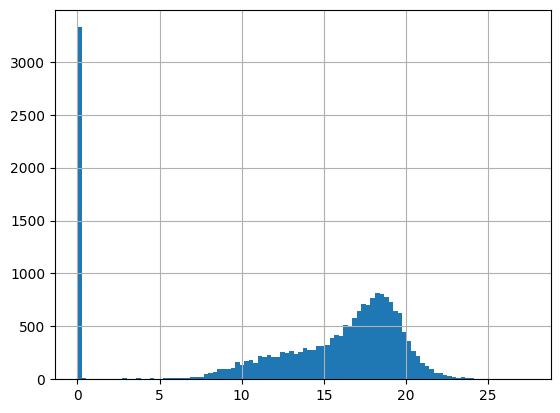

In [10]:
X_train.median().hist(bins=100)

In [11]:
X_train = X_train.loc[:, X_train.median() > 5]

In [12]:
X_train.shape

(190, 17701)

In [13]:
X_train

Gene,A1BGAS,A2BP1,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sampleId,,,,,,,,,,,,,,,,,,,,,
SEQC_NB324,17.2120,20.1335,14.5315,19.9684,0.0000,11.9337,14.3427,10.3969,19.6961,18.1438,...,18.1324,16.7605,14.4861,16.2050,19.0273,0.0000,19.8391,20.2606,19.5608,18.8167
SEQC_NB305,16.5018,19.4637,13.8600,19.6037,0.0000,10.2150,13.6370,9.0725,19.8035,18.2195,...,19.1212,19.7707,14.8420,16.2199,18.2406,9.3781,19.1937,19.1512,19.4345,18.8204
SEQC_NB096,16.1434,19.0748,15.2934,20.7683,11.5196,0.0000,14.7459,11.5679,19.8594,18.6028,...,18.9712,19.0694,14.8084,15.7586,18.6447,8.6691,19.1588,19.9347,19.0222,18.5647
SEQC_NB157,16.7688,19.2279,15.0867,20.8746,13.0523,10.8883,15.7479,11.2721,19.5607,17.6164,...,18.2131,17.4712,14.8704,16.5402,18.0904,9.9370,19.3924,19.9450,19.4356,18.7935
SEQC_NB167,16.2256,19.1613,14.6519,21.3254,0.0000,11.6232,15.8535,11.4449,19.5147,17.6826,...,17.3439,16.0085,15.0881,16.5732,18.5684,8.1276,19.5997,20.2493,19.4074,19.2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEQC_NB218,17.2790,18.4650,14.6535,20.3641,13.4018,0.0000,14.5823,11.6175,20.3679,18.9736,...,18.4607,18.7860,14.6715,16.2595,18.8309,10.5602,19.9761,20.0579,19.3179,18.6212
SEQC_NB244,17.2562,18.8896,15.7909,22.0597,10.9153,11.1139,16.4155,11.7244,19.3001,18.0834,...,17.0470,16.1998,15.2354,16.8942,18.4276,12.9273,19.9850,21.0383,19.1075,18.5479
SEQC_NB326,15.9690,16.0184,14.1948,20.3863,0.0000,0.0000,15.0606,10.5789,20.1523,17.9599,...,18.3819,18.5226,15.2619,17.1863,18.5018,10.0402,18.5258,20.7973,17.9354,17.8078


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [15]:
X_test_scaled = scaler.transform(X_test.loc[:,X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_train.columns)

# L1 Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

In [17]:
model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv = 5, random_state=1234, Cs= 20, class_weight = "balanced")
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [18]:
accuracy

0.9512195121951219

In [19]:
pd.crosstab(y_pred, y_test)

class_label,0,1
row_0,,
0,57,0
1,4,21


In [20]:
pd.crosstab(meta.loc[y_test.index].high_risk, meta.loc[y_test.index].class_label)

class_label,0,1
high_risk,,
0,61,4
1,0,17


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.84      1.00      0.91        21

    accuracy                           0.95        82
   macro avg       0.92      0.97      0.94        82
weighted avg       0.96      0.95      0.95        82



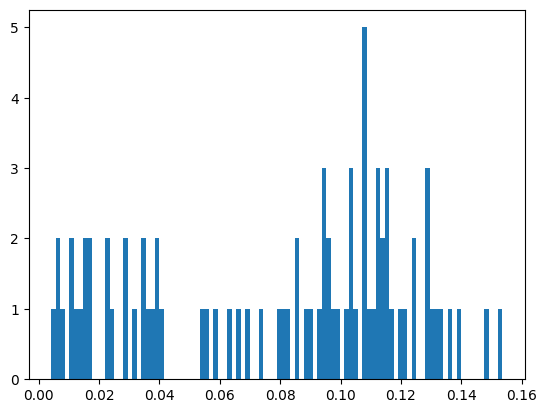

In [22]:
_ = plt.hist(model.predict_proba(X_test.loc[:, X_train.columns])[:,0], 100)

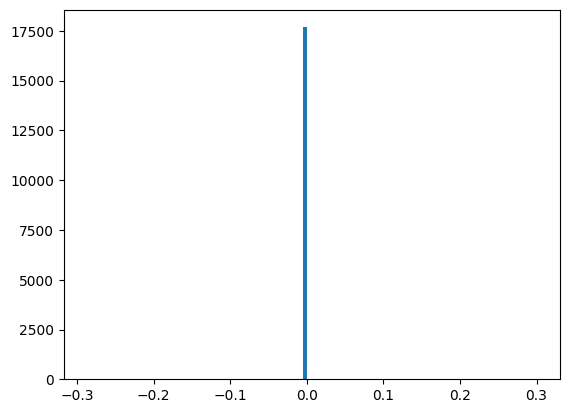

In [23]:
_ = plt.hist(model.coef_[0], 100)

In [24]:
sum(model.coef_[0] != 0)

23

In [25]:
indices = np.argsort(model.coef_[0])[::-1]

In [26]:
pd.DataFrame({"coef":model.coef_[0]}, index = X_train.columns).loc["MRPL11",]

coef    0.300671
Name: MRPL11, dtype: float64

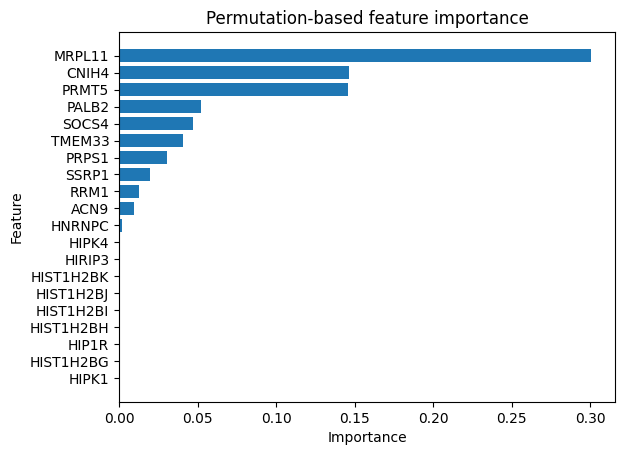

In [27]:
plt.barh(X_train.columns[indices][range(20)][::-1], model.coef_[0][indices][range(20)][::-1])
plt.title("Permutation-based feature importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

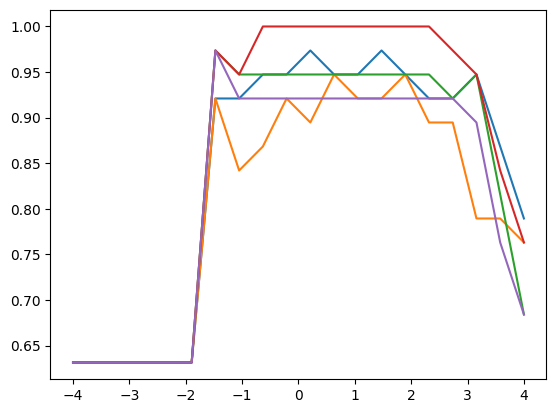

In [28]:
plt.plot(np.log10(model.Cs_), model.scores_[1].T)
plt.show()

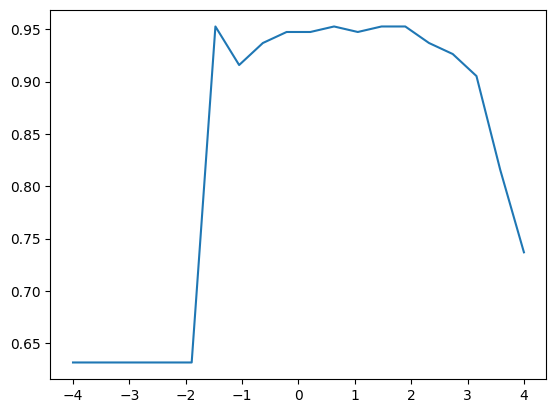

In [29]:
plt.plot(np.log10(model.Cs_), np.mean(model.scores_[1].T, axis = 1))
plt.show()

# Ranodm forest

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=1234, class_weight = "balanced")
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test.loc[:, X_train.columns])

In [32]:
accuracy = accuracy_score(y_test, y_pred)

In [33]:
accuracy

0.9634146341463414

In [34]:
pd.crosstab(y_pred, y_test)

class_label,0,1
row_0,,
0,59,1
1,2,20


In [35]:
pd.crosstab(meta.loc[y_test.index].high_risk, meta.loc[y_test.index].class_label)

class_label,0,1
high_risk,,
0,61,4
1,0,17


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.91      0.95      0.93        21

    accuracy                           0.96        82
   macro avg       0.95      0.96      0.95        82
weighted avg       0.96      0.96      0.96        82



In [37]:
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [38]:
# Print the feature ranking
print("Feature ranking:")
for f in range(20):
    print("%d. %s: feature %d (%f)" % (f + 1, X_train.columns[indices[f]], indices[f], importances[indices[f]]))

Feature ranking:
1. PIRT: feature 11585 (0.007622)
2. MRPL11: feature 9873 (0.007616)
3. BAZ2B: feature 1208 (0.007269)
4. SLC25A5P2: feature 14321 (0.007037)
5. PHLDB1: feature 11503 (0.006916)
6. EXO1: feature 4036 (0.006734)
7. SLC25A5: feature 14319 (0.006658)
8. ODC1: feature 10885 (0.006193)
9. PSMA6P1: feature 12234 (0.006158)
10. MAP7: feature 9369 (0.006156)
11. NUP37: feature 10823 (0.005794)
12. CAMTA1: feature 1572 (0.005495)
13. CNIH4: feature 2474 (0.005352)
14. PRMT5: feature 12131 (0.005264)
15. CDKN3: feature 2084 (0.005233)
16. FENL1: feature 4582 (0.005209)
17. POLE3: feature 11819 (0.005154)
18. TRIAP1: feature 16086 (0.005060)
19. SGSM2: feature 14058 (0.004823)
20. ELK1: feature 3812 (0.004787)


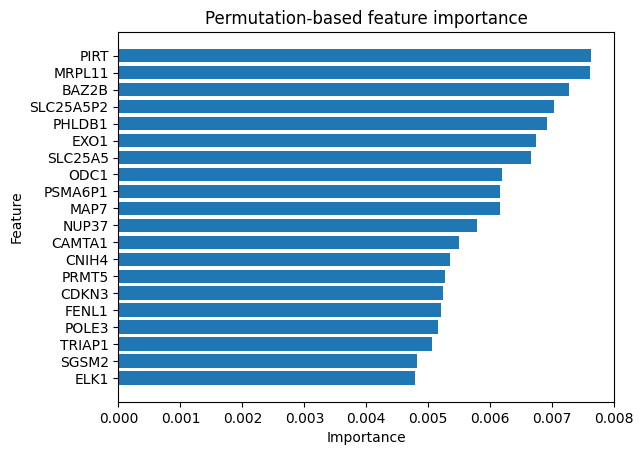

In [39]:
plt.barh(X_train.columns[indices][range(20)][::-1], importances[indices][range(20)][::-1])
plt.title("Permutation-based feature importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()